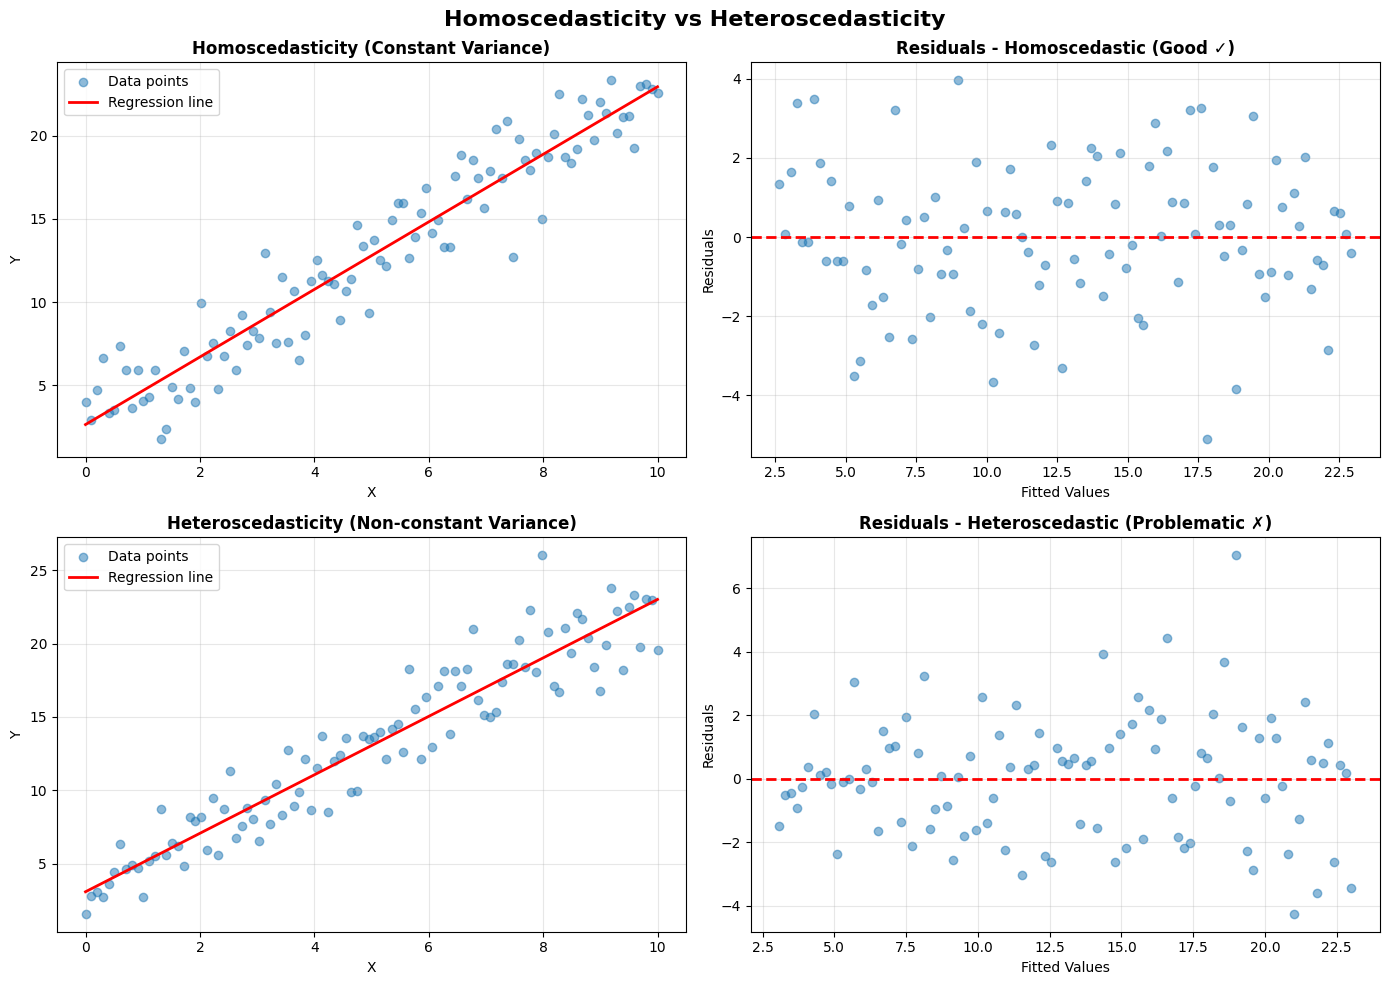

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n = 100
X = np.linspace(0, 10, n).reshape(-1, 1)

# Homoscedastic data (constant variance)
noise_homo = np.random.normal(0, 2, n)
y_homo = 2 * X.flatten() + 3 + noise_homo

# Heteroscedastic data (variance increases with X)
noise_hetero = np.random.normal(0, 1, n) * (1 + X.flatten() / 5)
y_hetero = 2 * X.flatten() + 3 + noise_hetero

# Fit linear regression models
model_homo = LinearRegression()
model_hetero = LinearRegression()

model_homo.fit(X, y_homo)
model_hetero.fit(X, y_hetero)

# Predictions
y_pred_homo = model_homo.predict(X)
y_pred_hetero = model_hetero.predict(X)

# Calculate residuals
residuals_homo = y_homo - y_pred_homo
residuals_hetero = y_hetero - y_pred_hetero

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Homoscedasticity vs Heteroscedasticity', fontsize=16, fontweight='bold')

# Plot 1: Homoscedastic scatter plot
axes[0, 0].scatter(X, y_homo, alpha=0.5, label='Data points')
axes[0, 0].plot(X, y_pred_homo, 'r-', linewidth=2, label='Regression line')
axes[0, 0].set_title('Homoscedasticity (Constant Variance)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Homoscedastic residuals
axes[0, 1].scatter(y_pred_homo, residuals_homo, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_title('Residuals - Homoscedastic (Good ✓)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Heteroscedastic scatter plot
axes[1, 0].scatter(X, y_hetero, alpha=0.5, label='Data points')
axes[1, 0].plot(X, y_pred_hetero, 'r-', linewidth=2, label='Regression line')
axes[1, 0].set_title('Heteroscedasticity (Non-constant Variance)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Heteroscedastic residuals
axes[1, 1].scatter(y_pred_hetero, residuals_hetero, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_title('Residuals - Heteroscedastic (Problematic ✗)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
